## Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file
df = pd.read_csv("day.csv")

## Understand Data

In [3]:
# see random sample
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
557,558,12-07-2019,3,1,7,0,4,1,1,29.349153,32.73415,52.9583,9.833925,1032,6414,7446
533,534,18-06-2019,2,1,6,0,1,1,2,23.301653,27.24210,77.7917,11.707982,653,4446,5099
693,694,25-11-2019,4,1,11,0,0,0,1,10.079153,12.87915,46.8333,10.083500,309,2115,2424
159,160,09-06-2018,2,0,6,0,4,1,2,33.141653,37.87895,56.8333,10.042161,563,3352,3915
27,28,28-01-2018,1,0,1,0,5,1,2,8.342598,11.16585,79.3043,8.261100,38,1129,1167


In [4]:
df.shape

(730, 16)

we have 730 rows and 17 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We have int and float type more with only one object type <br>
instant,temp,atemp,hum,windspeed,casual,registered,cnt are numerical vars, remaining are categorical

In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Cleaning Data

In [8]:
# instant column is just like ID, it doesnt give any info, hence drop it
df.drop(["instant"],inplace=True,axis=1)

In [9]:
# We have month and year column already derived from dteday, so we drop it
df.drop(["dteday"],inplace=True,axis=1)

In [10]:
# casual + registered is cnt, so we drop it
df.drop(["casual","registered"],inplace=True,axis=1)

In [11]:
df.season.unique()

array([1, 2, 3, 4])

In [12]:
df.season = df.season.replace({1: 'spring', 2: 'summer',3: 'fall',4: 'winter'})

In [13]:
df.sample(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
669,winter,1,11,0,4,1,2,14.999153,18.49710,58.1667,10.542182,5986
360,spring,0,12,0,2,1,2,13.325000,16.38165,76.2500,12.626150,1162
176,fall,0,6,0,0,0,1,27.880000,31.88145,51.3333,6.333731,5305
490,summer,1,5,0,0,0,2,23.062500,27.33685,74.0000,10.041893,6359
226,fall,0,8,0,1,1,1,27.299153,30.80835,71.2083,13.999918,4338


In [14]:
df.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [15]:
# converting weekdays to categorical names, not sure what 0 indicates whether sunday or tuesday as per calendar
df.weekday = df.weekday.replace({0: 'day0',1: 'day1',2: 'day2',3: 'day3',4: 'day4',5: 'day5',6: 'day6'})

In [16]:
df.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [17]:
df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [18]:
df.weathersit.unique()

array([2, 1, 3])

In [19]:
df.weathersit = df.weathersit.replace({1:"weather1",2:"weather2",3:"weather3"})

- weather1 : Clear, Few clouds, Partly cloudy
- weather2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- weather3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [20]:
df.tail(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
720,spring,1,dec,0,day6,0,weather1,10.899153,11.80565,44.1250,27.292182,1749
721,spring,1,dec,0,day0,0,weather1,10.079153,12.97355,51.5417,8.916561,1787
722,spring,1,dec,0,day1,1,weather2,9.483464,12.94500,79.1304,5.174437,920
723,spring,1,dec,1,day2,0,weather2,11.943464,14.72325,73.4783,11.304642,1013
724,spring,1,dec,0,day3,1,weather3,9.976653,11.01665,82.3333,21.208582,441
725,spring,1,dec,0,day4,1,weather2,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,day5,1,weather2,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,day6,0,weather2,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,day0,0,weather1,10.489153,11.58500,48.3333,23.500518,1796
729,spring,1,dec,0,day1,1,weather2,8.849153,11.17435,57.7500,10.374682,2729


## Data Visualization

In [21]:
df[["cnt","temp","atemp","hum","windspeed"]].corr()

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627044,0.630685,-0.098543,-0.235132
temp,0.627044,1.000000,0.991696,0.128565,-0.158186
atemp,0.630685,0.991696,1.000000,0.141512,-0.183876
hum,-0.098543,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.235132,-0.158186,-0.183876,-0.248506,1.000000


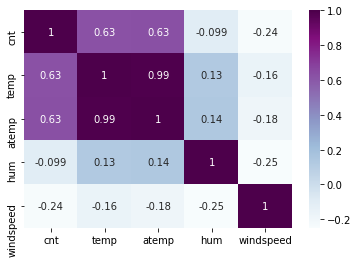

In [22]:
sns.heatmap(df[["cnt","temp","atemp","hum","windspeed"]].corr(),annot= True,cmap="BuPu")
plt.show()

temp is highly correlated with atemp<br>
temp and atemp are also moderately correlated with cnt

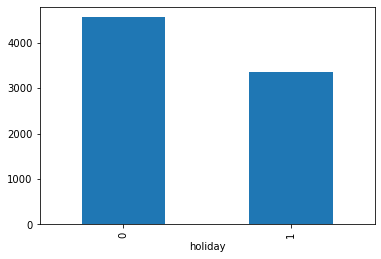

In [23]:
df.groupby("holiday")["cnt"].median().plot.bar()
plt.show()

there is less usage of bikes during holiday, as the holiday could be due to festival or govt holiday, people tend to stay in home

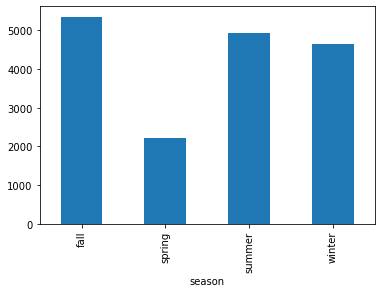

In [24]:
df.groupby(["season"])["cnt"].median().plot.bar()
plt.show()

during fall most bikeshares happend, and less during spring

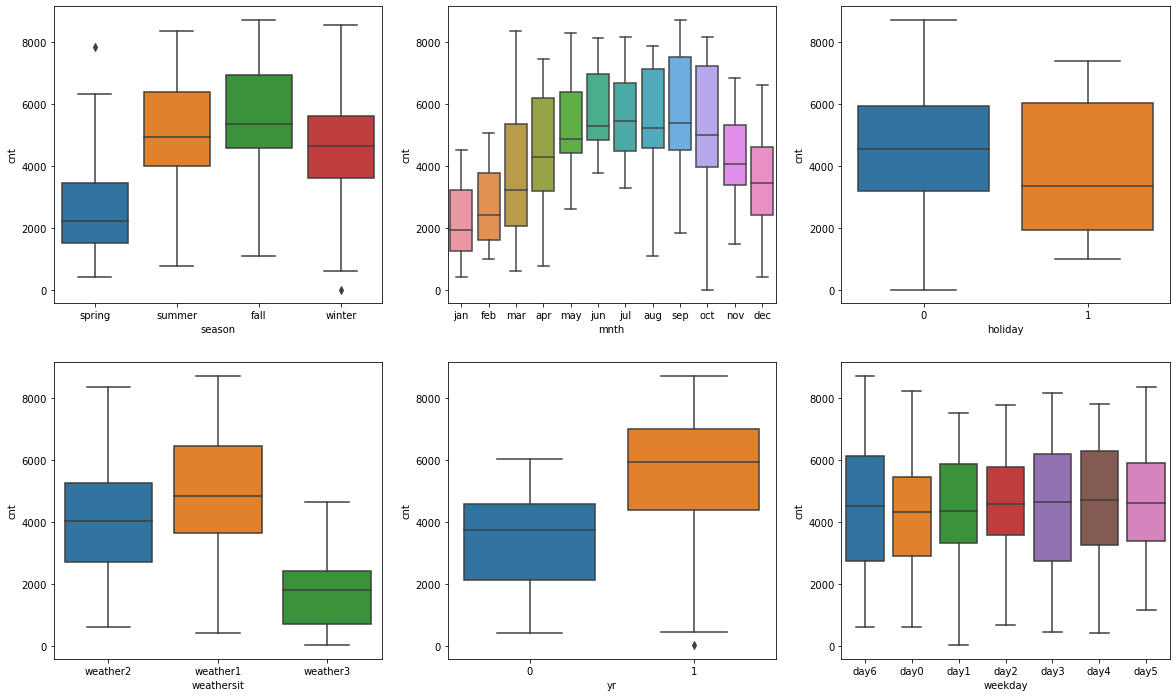

In [25]:

plt.figure(figsize=(20, 12))
catg_vars = ['season','mnth','holiday','weathersit','yr','weekday']

i=1
for var in catg_vars:
    plt.subplot(2,3,i)
    sns.boxplot(x = var, y = 'cnt', data = df)
    i+=1
plt.show()  

Inference:
- There are not much outliers in the data
- Bike Sharing is more in september month
- Bike sharing is more during Clear, Few clouds, Partly cloudy weather
- Bike sharing increased more in 2019 year
- Bike sharing is more during monday

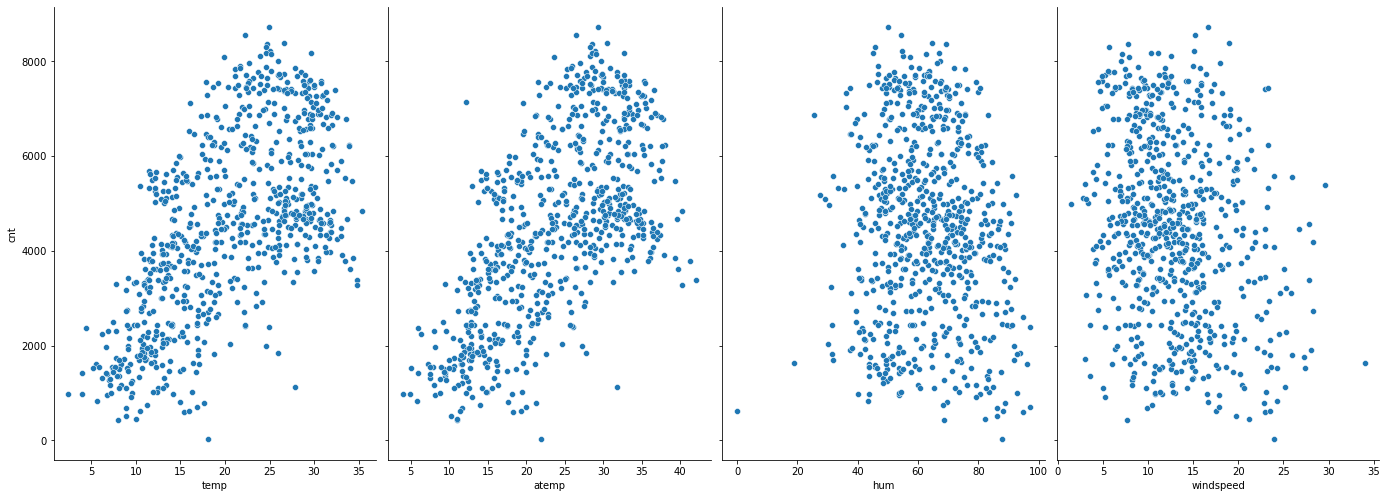

In [26]:
sns.pairplot(df, x_vars=["temp","atemp","hum","windspeed"], y_vars='cnt', size=7, aspect=0.7)
plt.show()

temp and atemp has some linear relationship with cnt

## Data Preparation

### Encode categorical columns to dummy variables

In [27]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasondummy'
seasondummy = pd.get_dummies(df['season'])

In [28]:
seasondummy.sample(5)

,fall,spring,summer,winter
97,0,0,1,0
39,0,1,0,0
715,0,0,0,1
111,0,0,1,0
677,0,0,0,1


- 000- fall
- 010- summer
- 001- winter
- 100- spring

we can drop fall column as last 3 columns with 0's indicate fall

In [29]:
seasondummy.drop(["fall"],inplace=True,axis=1)
df=pd.concat([df,seasondummy],axis=1)

In [30]:
df.sample(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
41,spring,0,feb,0,day5,1,weather1,7.752731,10.67545,50.6364,7.272850,1746,1,0,0
545,fall,1,jun,0,day6,0,weather1,31.365000,34.37540,60.1250,10.791757,5687,0,0,0
715,winter,1,dec,0,day1,1,weather2,16.126653,20.07500,90.7083,6.583306,4585,0,0,1
24,spring,0,jan,0,day2,1,weather2,9.162598,11.72630,61.6957,8.696332,1985,1,0,0
320,winter,0,nov,0,day4,1,weather2,14.008347,16.16105,57.5833,20.459254,3053,0,0,1


In [31]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekdaydummy'
weekdaydummy = pd.get_dummies(df['weekday'])

In [32]:
weekdaydummy.sample(5)

,day0,day1,day2,day3,day4,day5,day6
264,0,0,0,0,1,0,0
150,0,0,1,0,0,0,0
636,0,0,0,0,0,0,1
255,0,0,1,0,0,0,0
109,0,0,0,1,0,0,0


In [33]:
# drop day0 as all 0's in remaning indicate day0
weekdaydummy.drop(["day0"],inplace=True,axis=1)
df=pd.concat([df,weekdaydummy],axis=1)

In [34]:
df.sample(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,cnt,spring,summer,winter,day1,day2,day3,day4,day5,day6
125,summer,0,may,0,day5,1,weather1,19.645847,23.70585,59.0000,...,4608,0,1,0,0,0,0,0,1,0
297,winter,0,oct,0,day2,1,weather1,19.338347,23.16875,62.2917,...,4687,0,0,1,0,1,0,0,0,0
77,spring,0,mar,0,day6,0,weather1,19.372500,23.32625,37.9167,...,3117,1,0,0,0,0,0,0,0,1
233,fall,0,aug,0,day1,1,weather1,28.358347,31.91270,47.0000,...,4758,0,0,0,1,0,0,0,0,0
596,fall,1,aug,0,day1,1,weather2,26.069153,29.79835,73.4167,...,6530,0,0,0,1,0,0,0,0,0


In [35]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'monthdummy'
monthdummy = pd.get_dummies(df['mnth'])

In [36]:
monthdummy.sample(5)

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
159,0,0,0,0,0,0,1,0,0,0,0,0
310,0,0,0,0,0,0,0,0,0,1,0,0
588,0,1,0,0,0,0,0,0,0,0,0,0
219,0,1,0,0,0,0,0,0,0,0,0,0
717,0,0,1,0,0,0,0,0,0,0,0,0


In [37]:
# drop apr month as all 0's in remaning indicate apr
monthdummy.drop(["apr"],inplace=True,axis=1)
df=pd.concat([df,monthdummy],axis=1)

In [38]:
df.sample(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
10,spring,0,jan,0,day2,1,weather2,6.932731,9.57320,68.6364,...,0,0,1,0,0,0,0,0,0,0
146,summer,0,may,0,day5,1,weather1,27.948347,31.85040,65.3750,...,0,0,0,0,0,0,1,0,0,0
650,winter,1,oct,0,day6,0,weather1,16.126653,19.56980,49.4583,...,0,0,0,0,0,0,0,0,1,0
563,fall,1,jul,0,day3,1,weather1,32.526653,37.27915,57.7083,...,0,0,0,1,0,0,0,0,0,0
649,winter,1,oct,0,day5,1,weather1,17.937500,21.65355,53.9167,...,0,0,0,0,0,0,0,0,1,0


In [39]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weatherdummy'
weatherdummy = pd.get_dummies(df['weathersit'])

In [40]:
weatherdummy.sample(5)

,weather1,weather2,weather3
473,1,0,0
269,0,1,0
444,0,1,0
559,0,1,0
9,1,0,0


In [41]:
# drop weather1 month as all 0's in remaning indicate weather1
weatherdummy.drop(["weather1"],inplace=True,axis=1)
df=pd.concat([df,weatherdummy],axis=1)

In [42]:
# dropping columns for which we created dummy vars

df.drop(["mnth","season","weekday","weathersit"],inplace=True,axis=1)

In [43]:
df.sample(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,jan,jul,jun,mar,may,nov,oct,sep,weather2,weather3
340,0,0,1,16.810000,20.01230,97.0417,17.833725,705,0,0,...,0,0,0,0,0,0,0,0,0,1
506,1,0,1,25.215000,29.04125,76.5833,7.917189,6073,0,1,...,0,0,0,0,1,0,0,0,1,0
575,1,0,1,29.964153,34.24935,66.8750,10.292339,7105,0,0,...,0,1,0,0,0,0,0,0,0,0
114,0,0,1,24.873347,28.72500,77.6667,12.417311,4073,0,1,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,11.693897,13.86650,40.7826,14.956745,1812,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'day1', 'day2', 'day3', 'day4',
       'day5', 'day6', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep', 'weather2', 'weather3'],
      dtype='object')

In [45]:
df.shape

(730, 30)

number of columns have increased as we converted to dummy variables

## Data Modelling

### splitting data into test and train set

In [46]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features 

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [50]:
# Apply scaler() to all the numerical columns except 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [51]:
df_train[num_vars].head()

,temp,atemp,hum,windspeed,cnt
653,0.509887,0.501133,0.575354,0.300794,0.864243
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973


In [52]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,jan,jul,jun,mar,may,nov,oct,sep,weather2,weather3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 all values ranges between 0-1

In [53]:
# seperate dependent and independent variables
y_train = df_train.pop('cnt')
X_train = df_train

In [54]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,jan,jul,jun,mar,may,nov,oct,sep,weather2,weather3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### using automated way to eliminate features

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [57]:

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('day1', False, 7),
 ('day2', False, 8),
 ('day3', False, 13),
 ('day4', False, 14),
 ('day5', False, 11),
 ('day6', True, 1),
 ('aug', False, 3),
 ('dec', False, 9),
 ('feb', False, 10),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 12),
 ('mar', False, 6),
 ('may', False, 5),
 ('nov', False, 15),
 ('oct', True, 1),
 ('sep', True, 1),
 ('weather2', True, 1),
 ('weather3', True, 1)]

In [59]:
# columns selected by rfe
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'day6', 'jul', 'oct', 'sep', 'weather2',
       'weather3'],
      dtype='object')

In [60]:
# columns rejected by rfe
X_train.columns[~rfe.support_]

Index(['atemp', 'day1', 'day2', 'day3', 'day4', 'day5', 'aug', 'dec', 'feb',
       'jan', 'jun', 'mar', 'may', 'nov'],
      dtype='object')

### using statsmodel to eliminate remaining columns manually

In [61]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# we will create function to build model, as we need to use same code for all columns
def build_stats_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [63]:
# function to get VIF
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Model 1

In [64]:
# providing all cols selected by rfe as input
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'day6', 'jul', 'oct', 'sep', 'weather2',
       'weather3']
build_stats_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sun, 21 Nov 2021   Prob (F-statistic):          1.29e-191
Time:                        18:16:31   Log-Likelihood:                 520.48
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     494   BIC:                            -941.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2524      0.036      6.998      0.0

VIF of humidity high(>5), we will drop it

In [65]:
cols.remove("hum")

### model 2

In [66]:
build_stats_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Sun, 21 Nov 2021   Prob (F-statistic):          9.01e-189
Time:                        18:16:31   Log-Likelihood:                 510.95
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     495   BIC:                            -928.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1691      0.031      5.442      0.0

temp has VIF>5, we will drop it

In [67]:
cols.remove("temp")

### model 3

In [68]:
build_stats_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     135.0
Date:                Sun, 21 Nov 2021   Prob (F-statistic):          1.83e-153
Time:                        18:16:32   Log-Likelihood:                 424.16
No. Observations:                 510   AIC:                            -820.3
Df Residuals:                     496   BIC:                            -761.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5375      0.020     26.668      0.0

p value of july is >0.05, we will drop it

In [69]:
cols.remove("jul")

### model 4

In [70]:
build_stats_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.5
Date:                Sun, 21 Nov 2021   Prob (F-statistic):          1.55e-154
Time:                        18:16:32   Log-Likelihood:                 424.11
No. Observations:                 510   AIC:                            -822.2
Df Residuals:                     497   BIC:                            -767.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5349      0.018     29.243      0.0

p value of holiday is >0.05, we will drop it

In [71]:
cols.remove("holiday")

In [72]:
build_stats_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     159.0
Date:                Sun, 21 Nov 2021   Prob (F-statistic):          4.56e-155
Time:                        18:16:32   Log-Likelihood:                 422.73
No. Observations:                 510   AIC:                            -821.5
Df Residuals:                     498   BIC:                            -770.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5278      0.018     29.647      0.0

we have p value <0.05 and VIF<5 for all columns, hence a good model

## Residual Analysis of the train data

### check if the error terms are normally distributed

In [73]:
# cols will have selected features from above
X_train_new = X_train[cols]
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_sm).fit()

In [74]:
y_train_pred = lm.predict(X_train_sm)

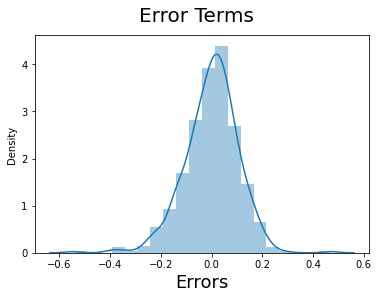

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

error terms are normally distributed

Text(0, 0.5, 'error terms')

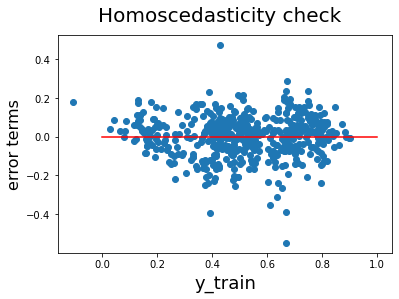

In [76]:
fig = plt.figure()
plt.scatter(y_train_pred,y_train - y_train_pred)
fig.suptitle('Homoscedasticity check', fontsize=20) 
p = sns.lineplot([0,1],[0,0.0],color='red')
plt.xlabel('y_train', fontsize=18)   
plt.ylabel('error terms', fontsize=16)    

### Mean of residuals

In [77]:
residuals = y_train - y_train_pred
np.mean(residuals)

6.057790434854224e-16

Mean of residuals is almost 0

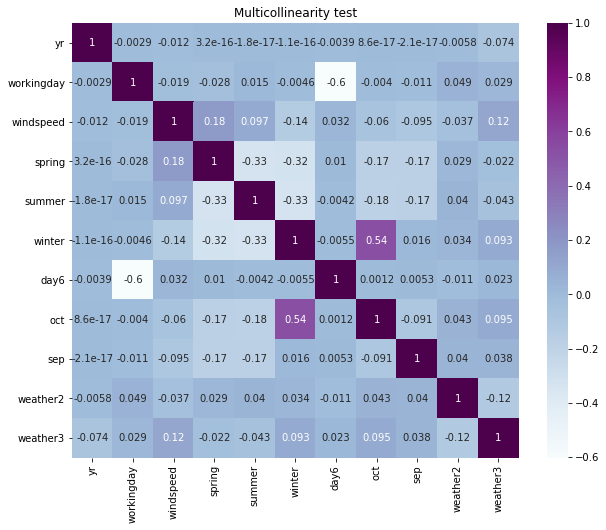

In [78]:
plt.figure(figsize = (10,8))
sns.heatmap(df[cols].corr(),annot= True,cmap="BuPu")
plt.title('Multicollinearity test')
plt.show()

there's no perfect multicollinearity between independent variables

## Making Predictions

#### Applying the scaling on the test sets

In [79]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [80]:
y_test = df_test.pop('cnt')
X_test = df_test

In [81]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[cols]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [82]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

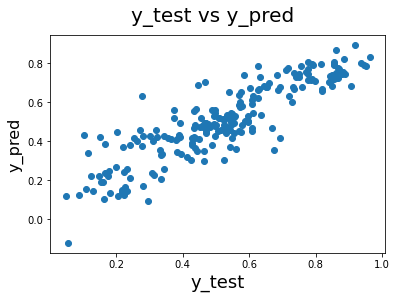

In [83]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     

In [84]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.7714935069822342

 0.778 was r_square of model, hence its a good model to predict

In [85]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
0,const,0.527779
1,yr,0.247569
8,oct,0.098191
9,sep,0.081997
7,day6,0.066053
2,workingday,0.058324
5,summer,-0.038901
10,weather2,-0.093444
6,winter,-0.104460


#### cnt = (0.247 x yr)+(0.098191 x oct)+(0.081997 x sep)+(0.066053 x day6)+(0.0583 x workingday)+(-0.038901 x summer)+(-0.093444 x weather2)+(-0.10446 x winter)+(-0.175142 x windspeed)+(-0.294121 x spring)+(-0.317268 x weather3)

#### important variables are 'yr', 'workingday', 'windspeed', 'spring', 'summer', 'winter','day6', 'oct', 'sep', 'weather2', 'weather3'

#### demand increases with year, oct and sept month, working day and day6, <br>
#### demand decreases with weather3,spring, windspeed,winter more than weather 2 and summer